<a href="https://colab.research.google.com/github/San123desh/DataWarehousingandDataMining/blob/main/Copy_of_Heirarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.askpython.com/python/examples/hierarchical-clustering
#https://blog.quantinsti.com/hierarchical-clustering-python/
#https://paayi.com/hierarchical-clustering-in-python
#https://www.analyticsvidhya.com/blog/2021/08/hierarchical-clustering-algorithm-python/

In [2]:
#Importing required libraries
#dataset description: https://archive.ics.uci.edu/ml/datasets/Iris/
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [3]:
#Getting the data ready
 # Import iris data
iris = datasets.load_iris()


In [4]:
iris_data = pd.dataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['flower_type'] = iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#Visualise the classes
iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
iris_Y = iris_data.iloc[:,4].values

In [6]:
iris_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
#class values having 0 from 0th column
iris_Y == 0,0

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [8]:
#data points from first column (0->sepal length) having class label 0
iris_X[iris_Y == 0, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [9]:
#data points from second column (1->sepal width) having class label 0
iris_X[iris_Y == 0, 1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [10]:
#data points from first column (0->sepal length) having class label 1
iris_X[iris_Y == 1, 0]

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

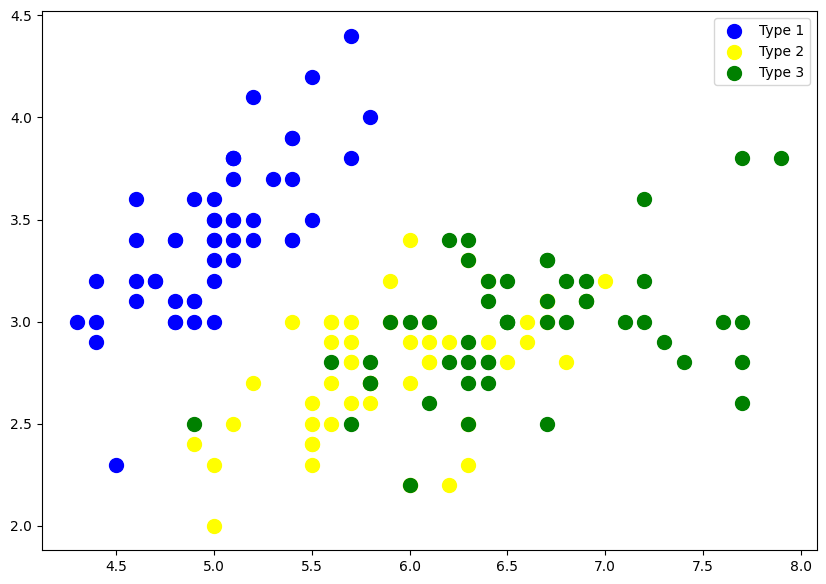

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s=100, c='blue', label='Type 1')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s=100, c='yellow', label='Type 2')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s=100, c='green', label='Type 3')
plt.legend()
plt.show()

In [12]:
#Create a dendrogram
#We start by importing the library that will help to create dendrograms. Dendrogram helps to give a rough idea of the number of clusters.

In [13]:
import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'Euclidean distance')

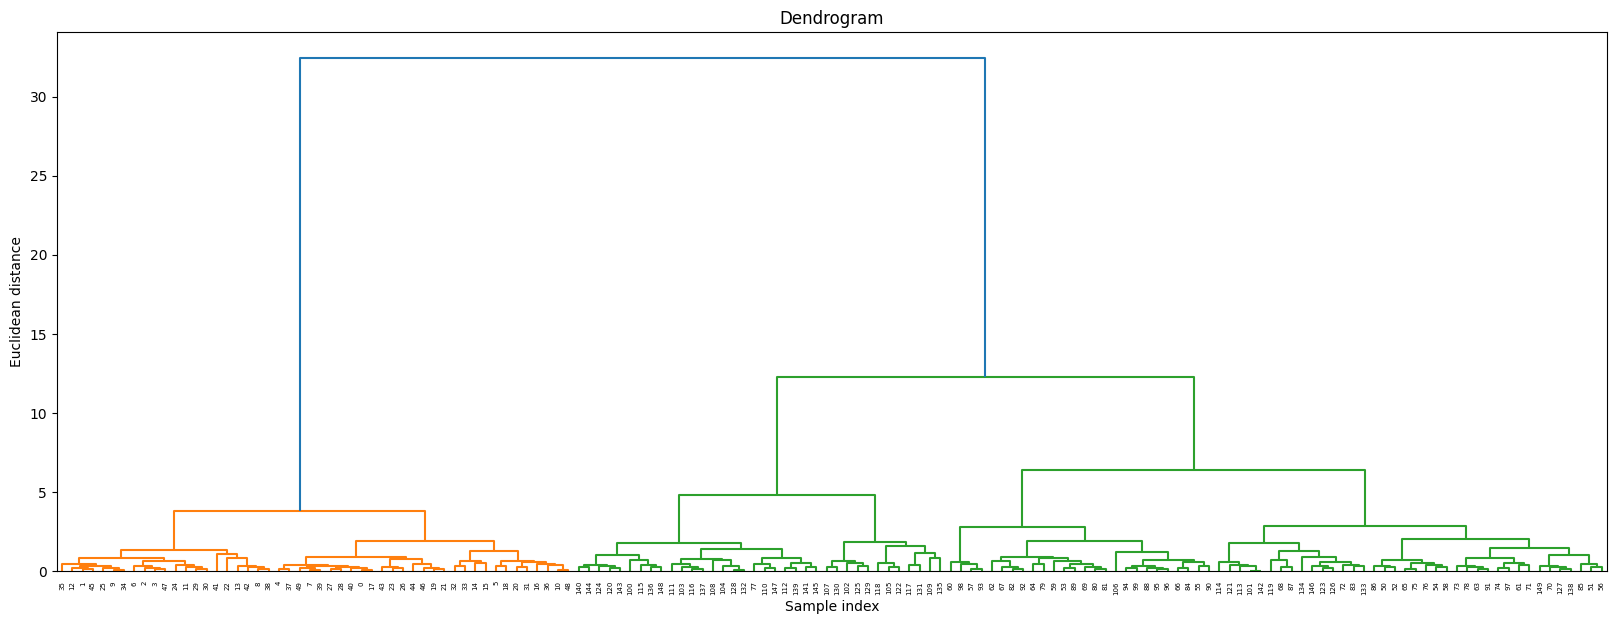

In [14]:
# Plot dendrogram
plt.figure(figsize=(20, 7))
plt.title("Dendrograms")

# Create dendrogram
sc.dendrogram(sc.linkage(iris_X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [15]:
#By looking at the above dendrogram, we divide the data into three clusters.
#Fit the model
#We instantiate the AgglomerativeClustering.
#Pass euclidean distance as the measure of the distance between points and ward linkage to calculate clusters' proximity.
#Then we fit the model on our data points.
#Finally, we return an array of integers where the values correspond to the distinct categories using lables_ property.

In [16]:
from sklearn.cluster import AgglomerativeClustering

# cluster = AgglomerativeClustering(
#     n_clusters=3, affinity='euclidean', linkage='ward')
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')


cluster.fit(iris_X)
labels = cluster.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

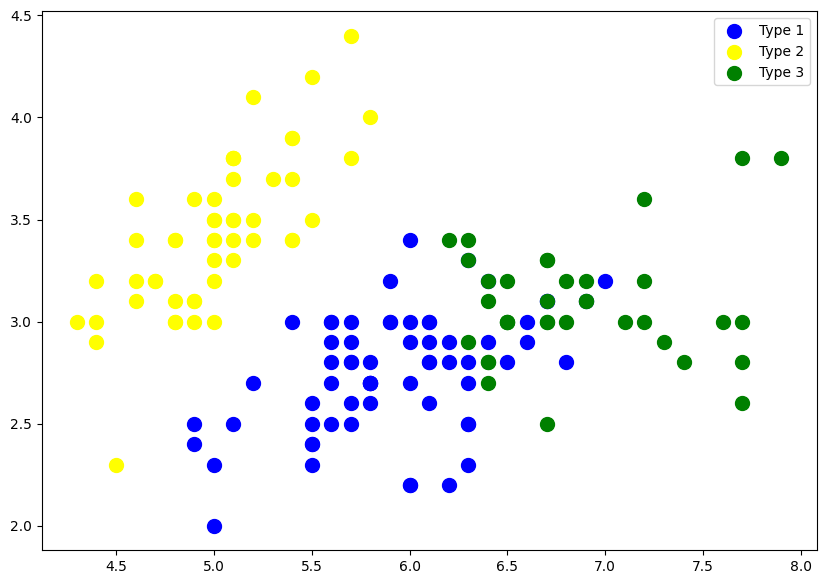

In [17]:
#Visualise the cluster
plt.figure(figsize=(10, 7))
plt.scatter(iris_X[labels == 0, 0], iris_X[labels == 0, 1], s = 100, c = 'blue', label = 'Type 1')
plt.scatter(iris_X[labels == 1, 0], iris_X[labels == 1, 1], s = 100, c = 'yellow', label = 'Type 2')
plt.scatter(iris_X[labels == 2, 0], iris_X[labels == 2, 1], s = 100, c = 'green', label = 'Type 3')
plt.legend()
plt.show()

In [18]:
#There is still an overlap between Type 1 and Type 3 clusters.
#But if you compare with the original clusters, the classification has improved quite a bit.

In [19]:
#Task:
#Use this link https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-hierarchical-clustering or any other source
#and take one of the datasets present in the link.
#Practice Agglomerative Heirarchical clustering


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CreditCardTransactiondata.csv')


In [32]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [33]:
data.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [34]:
from sklearn.impute import SimpleImputer

In [35]:
impute=SimpleImputer(missing_values=np.nan, strategy='mean')

In [36]:
data_new=impute.fit_transform(data[['MINIMUM_PAYMENTS','CREDIT_LIMIT']])

In [37]:
data_new=pd.dataFrame(data_new,columns=['MINIMUM_PAYMENTS','CREDIT_LIMIT'])


In [38]:
data_new

,MINIMUM_PAYMENTS,CREDIT_LIMIT
0,139.509787,1000.0
1,1072.340217,7000.0
2,627.284787,7500.0
3,864.206542,7500.0
4,244.791237,1200.0
...,...,...
8945,48.886365,1000.0
8946,864.206542,1000.0
8947,82.418369,1000.0
8948,55.755628,500.0


In [40]:
# droping unnecessary Feature
data.drop(['MINIMUM_PAYMENTS','CREDIT_LIMIT','CUST_ID'],axis=1,inplace=True)

In [41]:

data = pd.concat([data,data_new],axis=1)
col=data.columns


In [43]:
# scaling the values of dataset
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scale=StandardScaler()
values =scale.fit_transform(data)


minmax=MinMaxScaler()
values = minmax.fit_transform(values)

data = pd.DataFrame(data,columns=col)

data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS,CREDIT_LIMIT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,201.802084,0.000000,12,139.509787,1000.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,4103.032597,0.222222,12,1072.340217,7000.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,622.066742,0.000000,12,627.284787,7500.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,0.000000,0.000000,12,864.206542,7500.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,678.334763,0.000000,12,244.791237,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,325.594462,0.500000,6,48.886365,1000.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,275.861322,0.000000,6,864.206542,1000.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,81.270775,0.250000,6,82.418369,1000.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,52.549959,0.250000,6,55.755628,500.0


In [45]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,PRC_FULL_PAYMENT,TENURE,MINIMUM_PAYMENTS,CREDIT_LIMIT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,1733.143852,0.153715,11.517318,864.206542,4494.449450
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,2895.063757,0.292499,1.338331,2330.588021,3638.612411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.019163,50.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,383.276166,0.000000,12.000000,170.857654,1600.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,856.901546,0.000000,12.000000,335.628312,3000.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,1901.134317,0.142857,12.000000,864.206542,6500.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,50721.483360,1.000000,12.000000,76406.207520,30000.000000


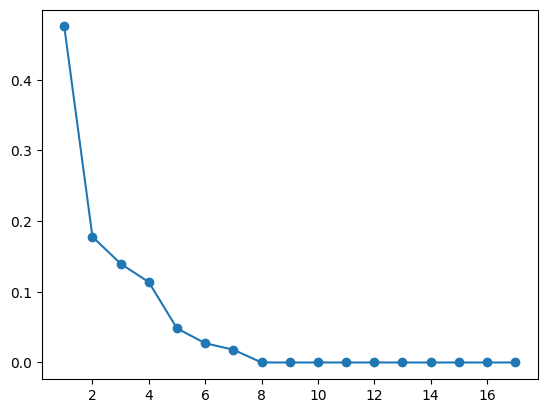

In [46]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

pca=PCA(n_components=17)
p=pca.fit_transform(data)

x = range(1,18)
y = pca.explained_variance_ratio_
plt.plot(x,y, marker='o')
plt.show()

In [47]:
pca=PCA(n_components=2)
p=pca.fit_transform(data)
data = pd.DataFrame(p,columns=['X','Y'])
data

,X,Y
0,-4326.383956,921.566884
1,4118.916676,-2432.846347
2,1497.907660,-1997.578692
3,1394.548556,-1488.743450
4,-3743.351874,757.342659
...,...,...
8945,-4208.357938,1122.443274
8946,-4123.924001,951.683803
8947,-4379.444202,911.504566
8948,-4791.117744,1032.540944


<Axes: xlabel='X', ylabel='Y'>

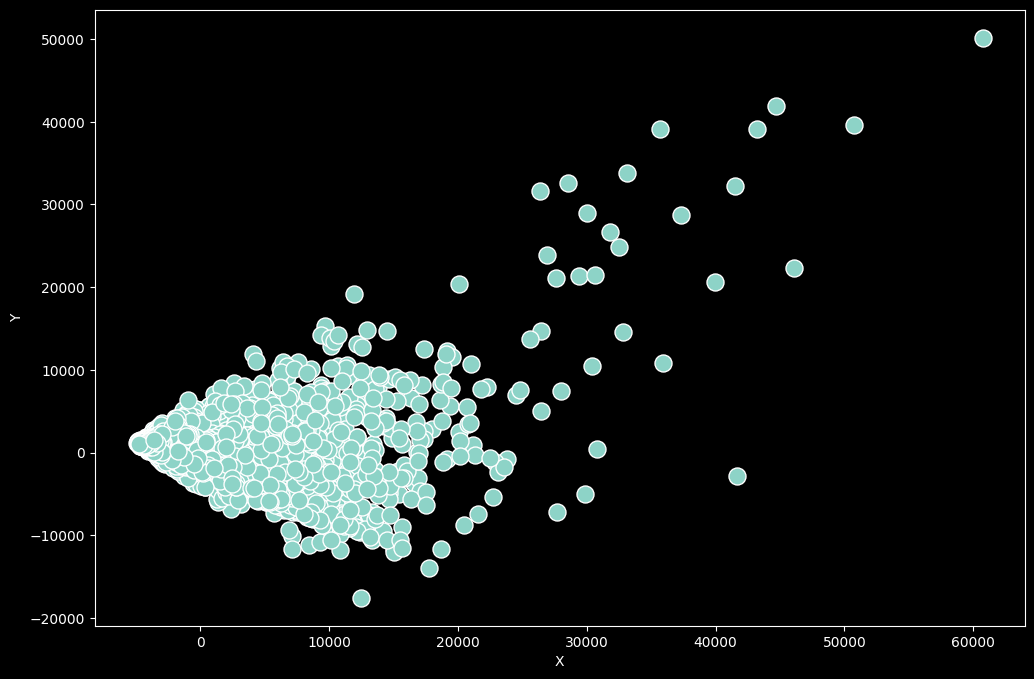

In [52]:
import seaborn as sns
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.scatterplot(x='X',y='Y',data=data,s=150)

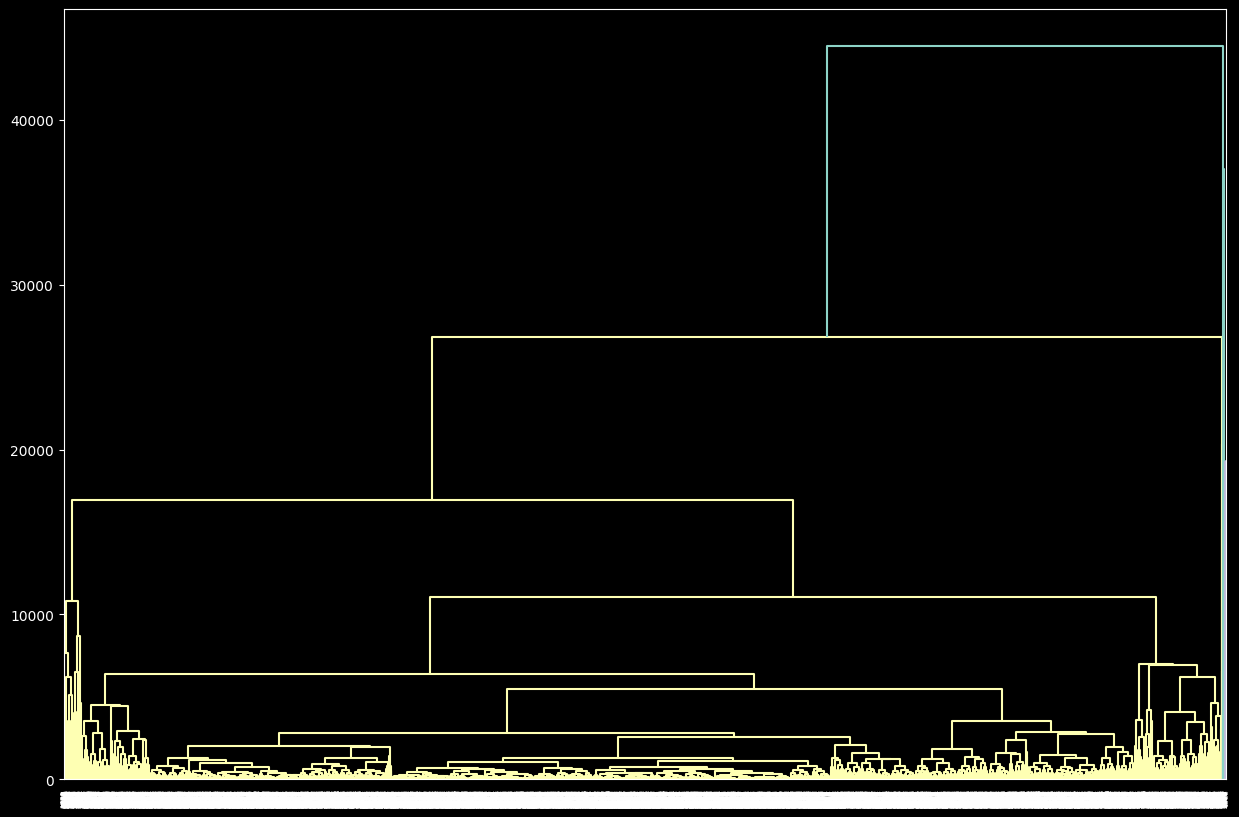

In [53]:
# Dendogram
linkage_data=linkage(data,'average')


plt.figure(figsize=(15,10))
dendrogram(linkage_data,labels=data.index)
plt.show()

In [55]:
# AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3)
data['Label']=cluster.fit_predict(data)



<Axes: xlabel='X', ylabel='Y'>

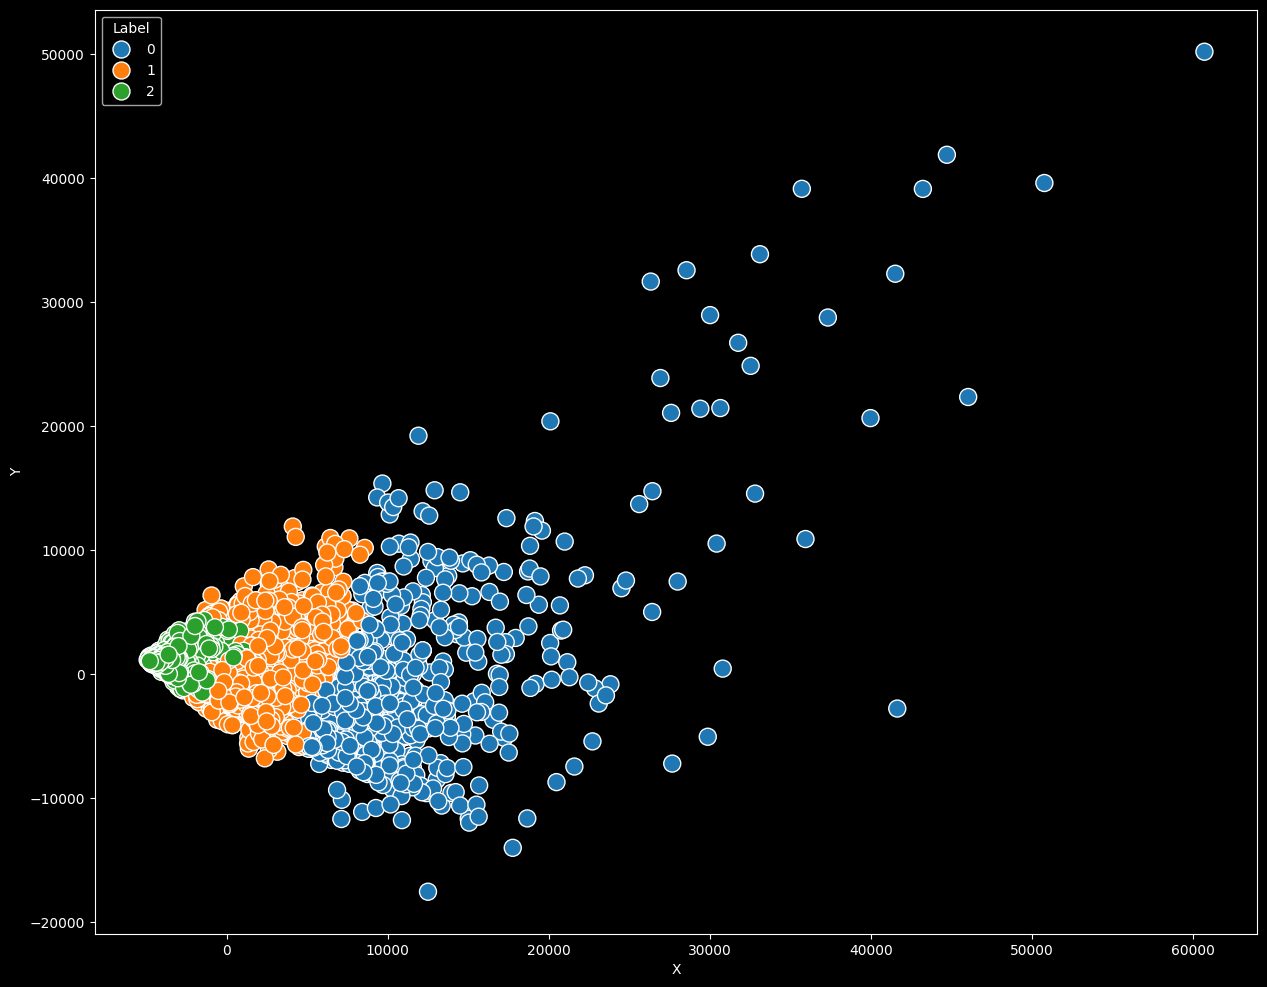

In [57]:
plt.style.use('dark_background')
plt.figure(figsize=(15,12))
sns.scatterplot(x='X',y='Y',data=data,hue='Label',s=150,palette='tab10')